# Probelm Statement

We work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If company is able to identify the pattern of the defaulters, they can take effective measures in approving loan to the right customers thereby reducing the risk of any loss.

__Dataset understanding__

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    -  Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    -  Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
  
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [21]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [23]:
# Reading the loan.csv file
loan_file = pd.read_csv('loan.csv',low_memory=False)
loan_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [25]:
# Understanding the file size and datatypes
print("Size of loan file:")
print(loan_file.shape)
print("Datatypes of columns:")
print(loan_file.dtypes)
print("Loan file info:")
print(loan_file.info())


Size of loan file:
(39717, 111)
Datatypes of columns:
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code              

__Column analysis to determine if there are any columns that can be dropped from the dataset__

In [27]:
#Number of null values in each column
loan_file.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [31]:
#Calculating percentage of null values in each columns
np.round((loan_file.isnull().sum())/(len(loan_file))*100,2).sort_values(ascending=False)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [33]:
#Columns having all null values
print(loan_file.columns[loan_file.isnull().all()])

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [35]:
#Removing columns which have 100% null values and next_pymnt_d and mths_since_last_record as it has very high percentage null values
loan_filtered = loan_file.dropna(axis=1, how='all') 
loan_filtered = loan_filtered.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1)

In [37]:
#rows and columns after dropping columns with high percentage null values
loan_filtered.shape

(39717, 54)

In [39]:
#Identifying columns with single value and removing them 
loan_filtered_unique_columns = loan_filtered.loc[:, loan_filtered.nunique() == 1].columns
loan_filtered = loan_filtered.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis=1)
loan_filtered.shape

(39717, 45)

In [43]:
#checking for duplicate rows. There are no duplicate rows
loan_filtered[loan_filtered.duplicated()].shape

(0, 45)

In [47]:
loan_filtered.shape

(39717, 45)

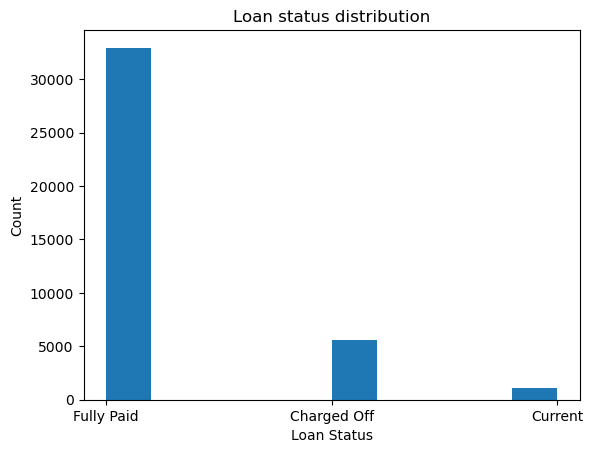

In [153]:
#Plotting the loan_status column to visualize the count of customers 
plt.hist(loan_filtered.loan_status)
plt.title("Loan status distribution")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

__Since we need to analyse the patterns of defaulters. Filtering the dataset with loan status 'Charged Off'.__

In [51]:
# Details of charged off customers and count(Defaulters)
loan_charged_off_cust=loan_filtered[loan_filtered.loan_status == 'Charged Off']
loan_charged_off_cust.shape

(5627, 45)

In [53]:
#Changing issue date column to standard format

loan_charged_off_cust['issue_d'] = pd.to_datetime(loan_charged_off_cust['issue_d'], format='%b-%y')
loan_charged_off_cust['issue_d'] = loan_charged_off_cust['issue_d'].dt.strftime('%m-%d-%Y')
loan_charged_off_cust["issue_d_year"] = pd.DatetimeIndex(loan_charged_off_cust["issue_d"]).year
loan_charged_off_cust["issue_d_month"] = pd.DatetimeIndex(loan_charged_off_cust["issue_d"]).month
loan_charged_off_cust.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,2011,12
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,2011,12
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,2011,12
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,2011,12
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.50%,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,2011,12


In [55]:
# Converting column datatype
loan_charged_off_cust = loan_charged_off_cust.astype({'funded_amnt': 'float','loan_amnt' : 'float'})
loan_charged_off_cust['term'] = loan_charged_off_cust['term'].apply(lambda i: int(i.replace('months', '').strip()))
loan_charged_off_cust['int_rate'] = loan_charged_off_cust['int_rate'].apply(lambda i: float(i.replace('%', '').strip()))
for amnt in ['funded_amnt', 'funded_amnt_inv','loan_amnt','int_rate', 'dti']:
    loan_charged_off_cust[amnt] = loan_charged_off_cust[amnt].apply(lambda i: round(i, 2))
loan_charged_off_cust.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,2011,12
8,1071795,1306957,5600.0,5600.0,5600.0,60,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,2011,12
9,1071570,1306721,5375.0,5375.0,5350.0,60,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,2011,12
12,1064687,1298717,9000.0,9000.0,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,2011,12
14,1069057,1303503,10000.0,10000.0,10000.0,36,10.65,325.74,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,12-01-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.50%,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,2011,12


## Creating bins for numerical columns

In [57]:
#Creating bins for loan amount
loan_amnt_bins = [0,5000, 10000, 15000, 20000,25000]  
loan_amnt_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k','20k-Above']
loan_charged_off_cust['loan_amnt_bins'] = pd.cut(loan_charged_off_cust['loan_amnt'], bins=loan_amnt_bins, labels=loan_amnt_labels)

#Creating bins for interest rate
int_rate_bins = [5,9,13,17,21,25] 
int_rate_labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_charged_off_cust['int_rate_bins'] = pd.cut(loan_charged_off_cust['int_rate'], bins=int_rate_bins, labels=int_rate_labels)
#loan_charged_off_cust[['int_rate','int_rate_bins']].sort_values(by='int_rate')

#Creating bins for annual income
annual_inc_bins = [0,40000,50000,60000,70000,80000] 
annual_inc_labels = ['Upto 40k','40k-50k','50k-60k','60k-70k','80k-Above']
loan_charged_off_cust['annual_inc_bins'] = pd.cut(loan_charged_off_cust['annual_inc'], bins=annual_inc_bins, labels=annual_inc_labels)


#Creating bins for funded amount
funded_amnt_bins = [0,5000,10000,20000,30000,40000] 
funded_amnt_labels = ['Upto 5k','5k-10k','10k-20k','20k-30k','30k-Above']
loan_charged_off_cust['funded_amnt_bins'] = pd.cut(loan_charged_off_cust['funded_amnt'], bins=funded_amnt_bins, labels=funded_amnt_labels)
loan_charged_off_cust[['funded_amnt','funded_amnt_bins']].sort_values(by='funded_amnt')

#Creating bins for funded amount inv
funded_amnt_inv_bins = [-1,5000,10000,20000,30000,40000] 
funded_amnt_inv_labels = ['Upto 1k','1k-10k','10k-20k','20k-30k','30k-Above']
loan_charged_off_cust['funded_amnt_inv_bins'] = pd.cut(loan_charged_off_cust['funded_amnt_inv'], bins=funded_amnt_inv_bins, labels=funded_amnt_inv_labels)

#Creating bins for dti
dti_bins = [-float('inf'),0,6,12,18,24] 
dti_labels = ['Very Low','Low','Medium','High','Very High']
loan_charged_off_cust['dti_bins'] = pd.cut(loan_charged_off_cust['dti'], bins=dti_bins, labels=dti_labels)


#Creating bins for installment
installment_bins = [-float('inf'),100,400,700,1000,1200,1400] 
installment_labels = ['Upto 100','100-400','400-700','700-1000','1000-1100','1100-Above']
loan_charged_off_cust['installment_bins'] = pd.cut(loan_charged_off_cust['installment'], bins=installment_bins, labels=installment_labels)


# Outlier handling

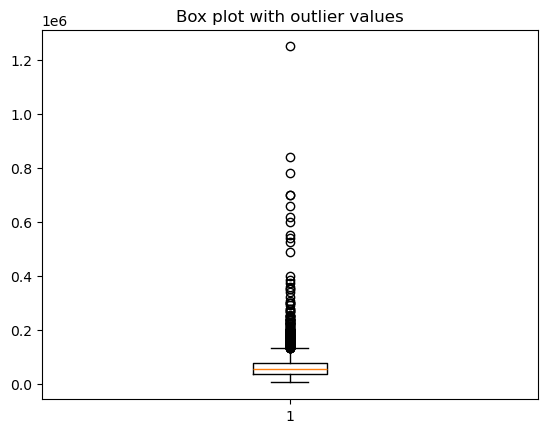

In [59]:
#Box plot with outlier values
plt.boxplot(loan_charged_off_cust.annual_inc)
plt.title('Box plot with outlier values')
plt.show()

From the box plot we can see that there are few outliers in the annual income values. We can remove the outliers rows.

In [61]:
annual_inc_Q1=loan_charged_off_cust['annual_inc'].quantile(0.25)
annual_inc_Q3=loan_charged_off_cust['annual_inc'].quantile(0.75)
IQR=annual_inc_Q3-annual_inc_Q1
lower_range=annual_inc_Q1-1.5*IQR
upper_range=annual_inc_Q3+1.5*IQR

In [63]:
loan_charged_off_cust=loan_charged_off_cust[(loan_charged_off_cust["annual_inc"]<= upper_range)]

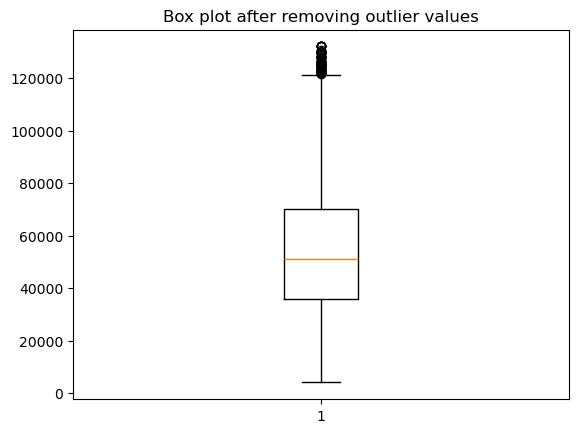

In [65]:
#Box plot after removing outlier values
plt.boxplot(loan_charged_off_cust.annual_inc)
plt.title('Box plot after removing outlier values')
plt.show()

# Univariate Analysis

In [218]:
def bar_graph_plot(loan_charged_off_cust, columns, title_prefix='Bar Graph of '): 
    for ord_cat in columns: 
        plt.figure(figsize=(8, 6)) 
        loan_charged_off_cust[ord_cat].value_counts().plot.bar() 
        plt.title(f'{title_prefix}{ord_cat}') 
        plt.xlabel(ord_cat) 
        plt.ylabel('Frequency') 
        plt.show() 

__Univariate analysis of ordered categorical variables of defaulters__

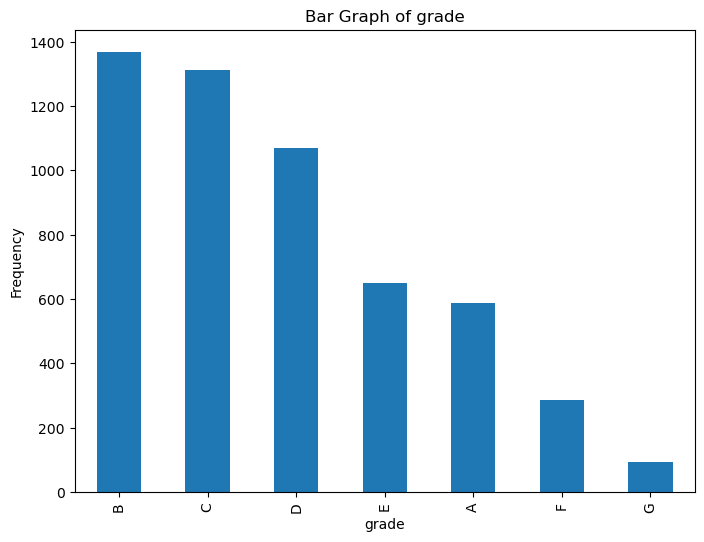

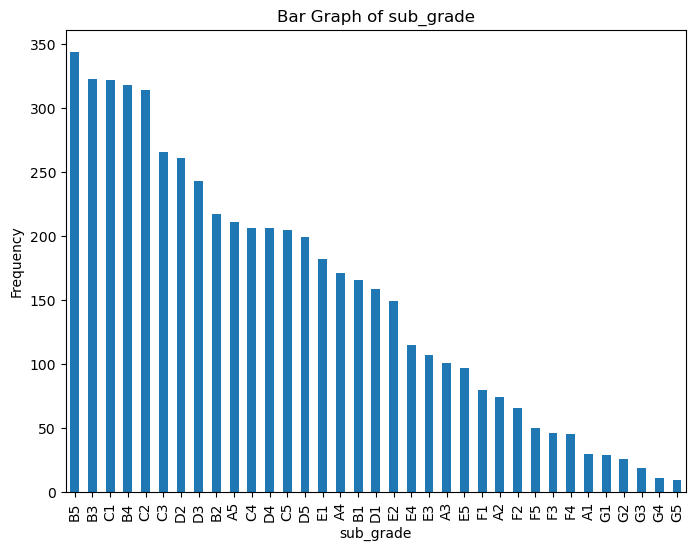

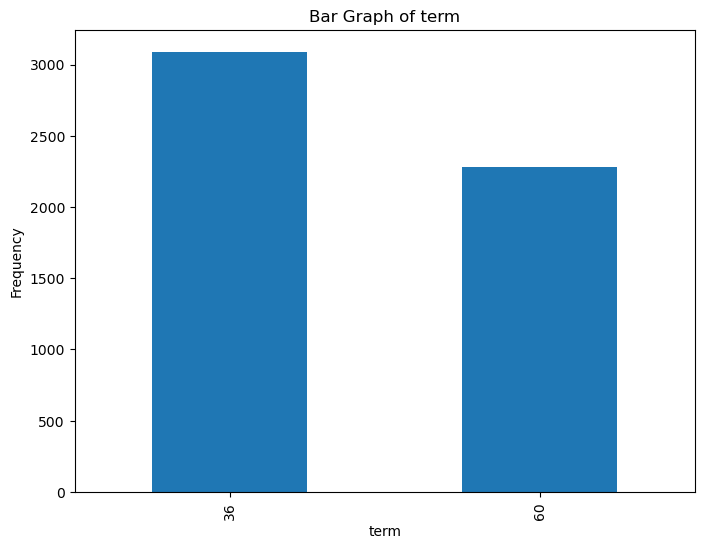

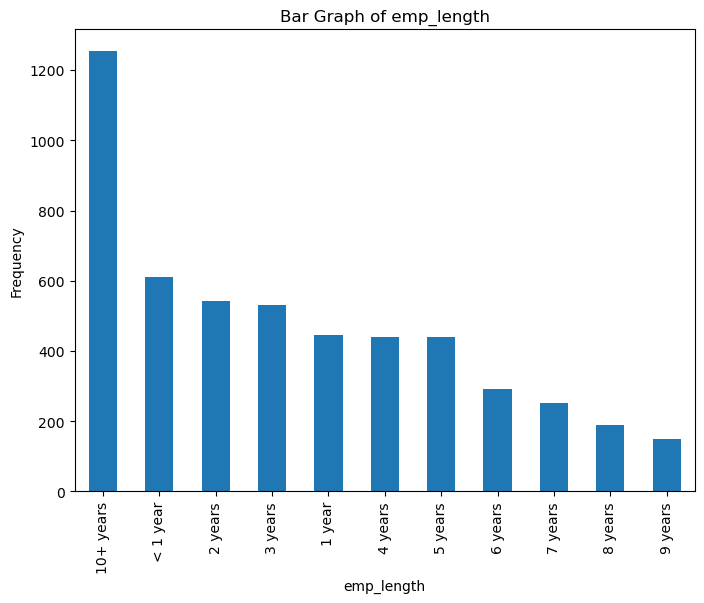

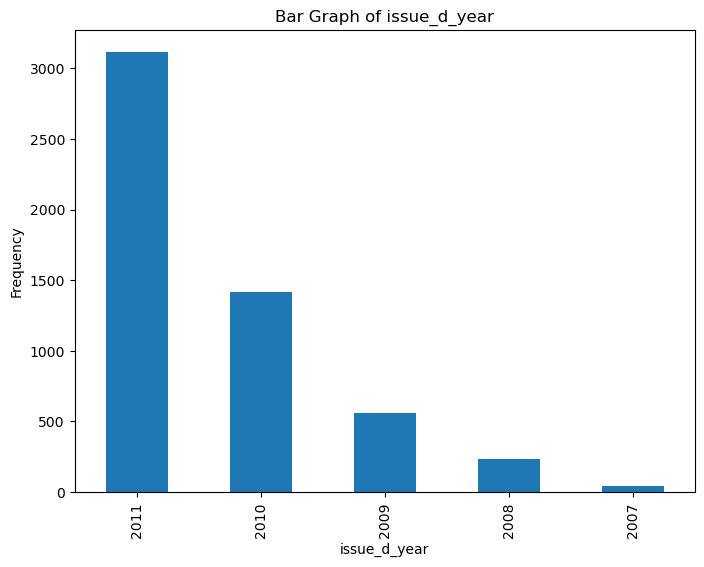

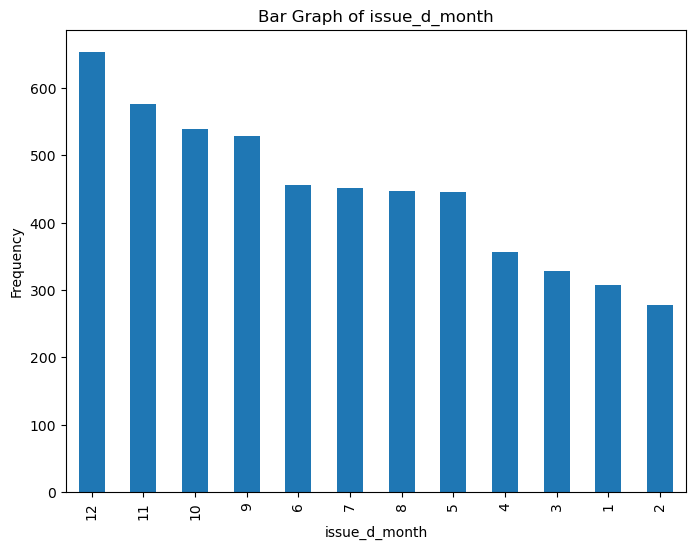

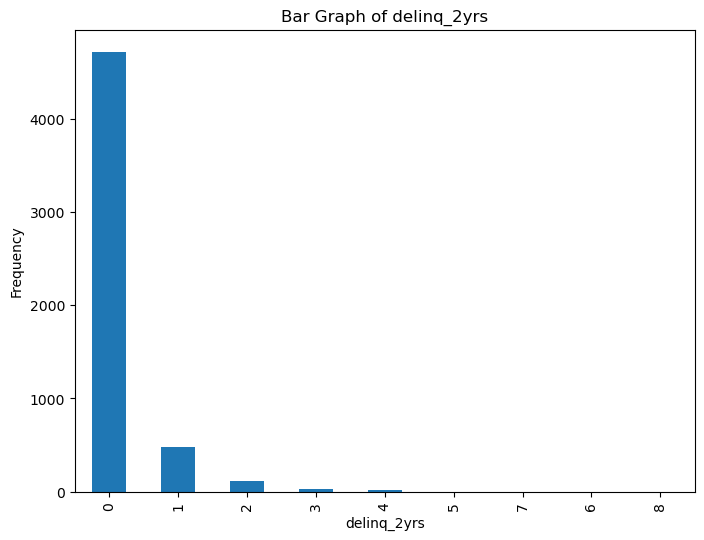

In [220]:
ordered_categorical_columns = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_d_year','issue_d_month','delinq_2yrs']
bar_graph_plot(loan_charged_off_cust, ordered_categorical_columns)

__Univariate analysis of unordered categorical data of defaulters__

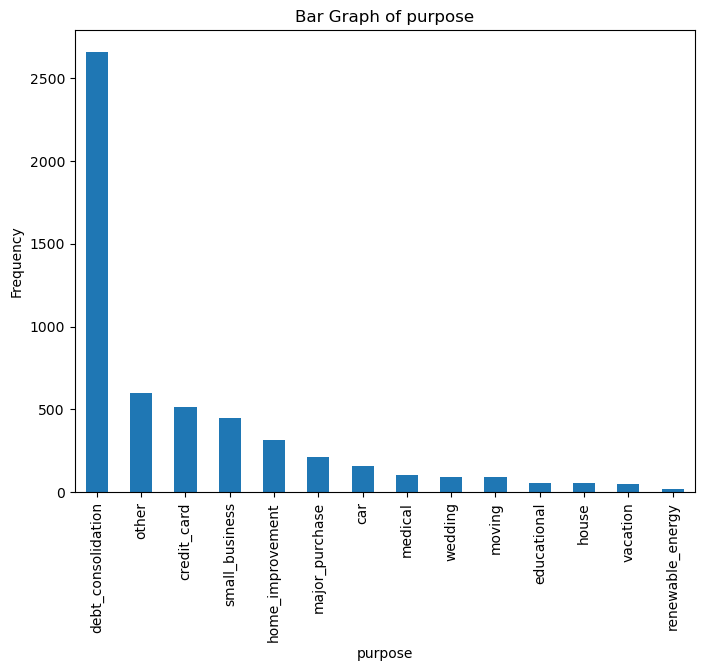

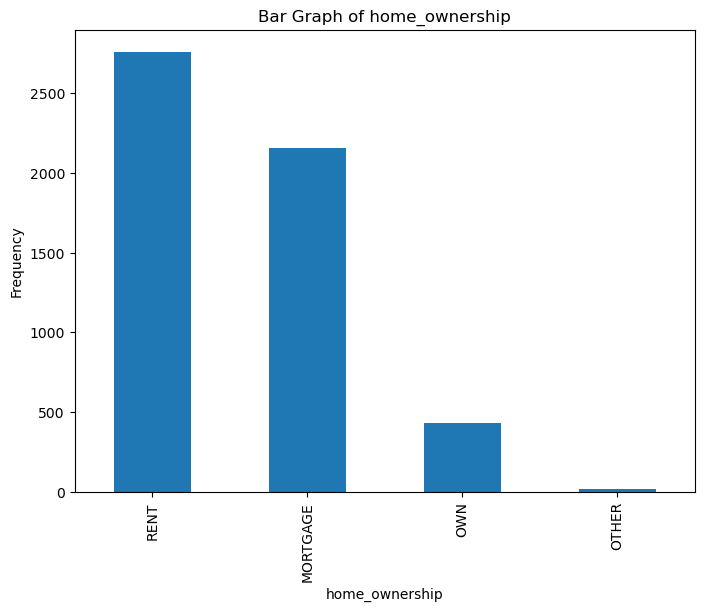

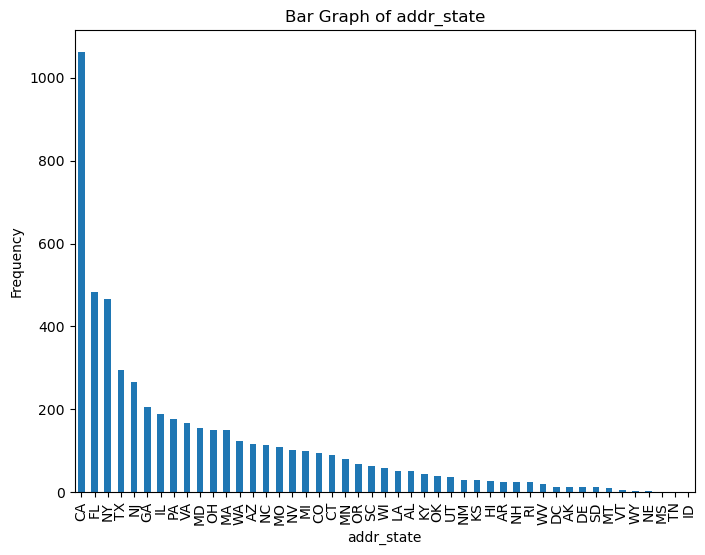

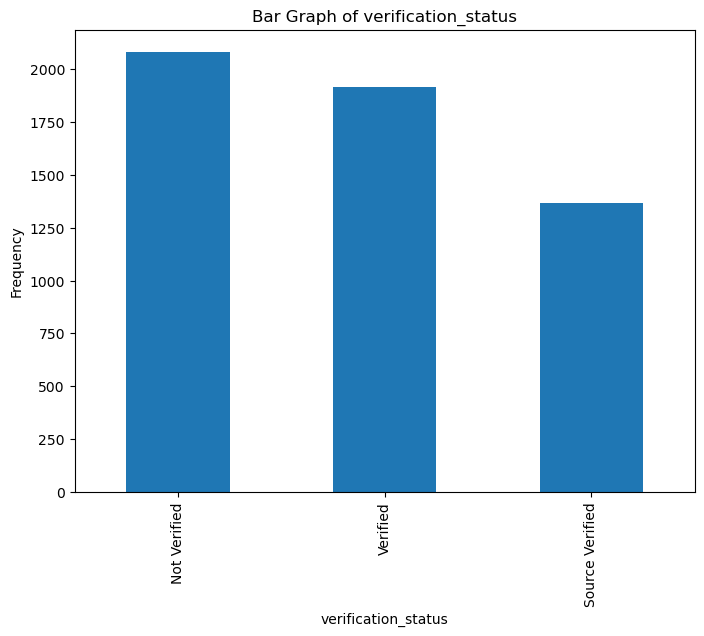

In [222]:
unordered_categorical_columns = ['purpose', 'home_ownership','addr_state','verification_status']
bar_graph_plot(loan_charged_off_cust, unordered_categorical_columns)

__Univariate analysis of Quantitative variables of defaulters__

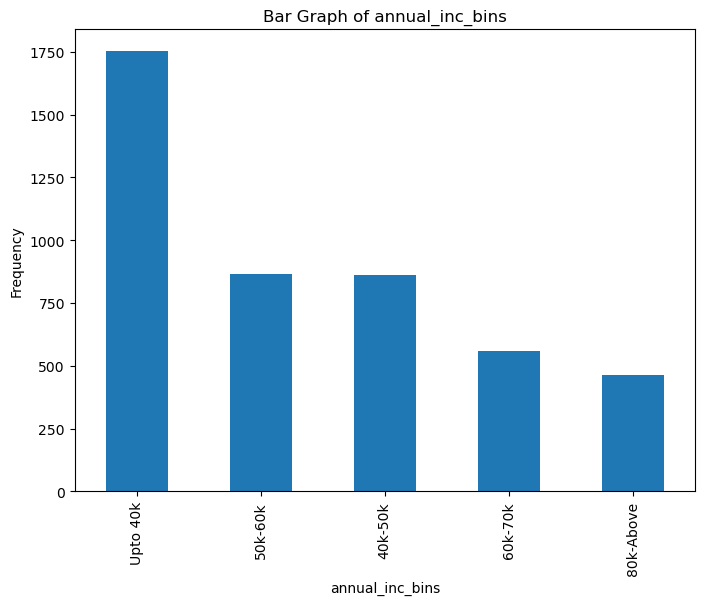

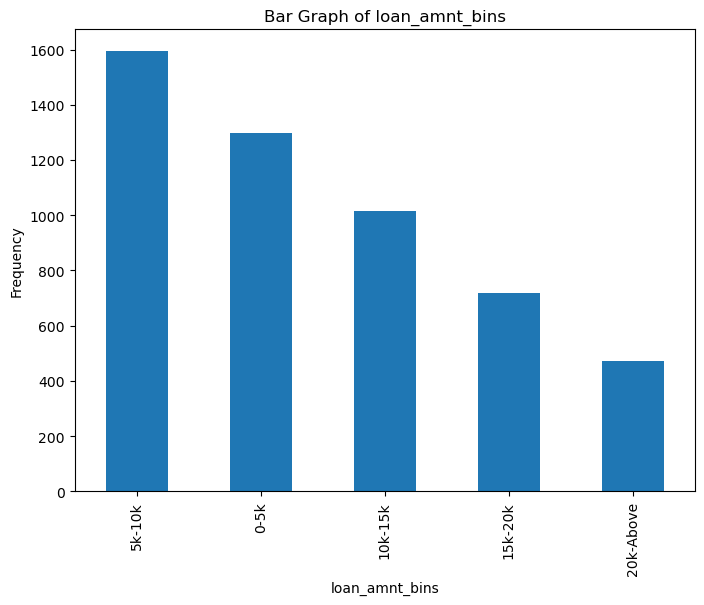

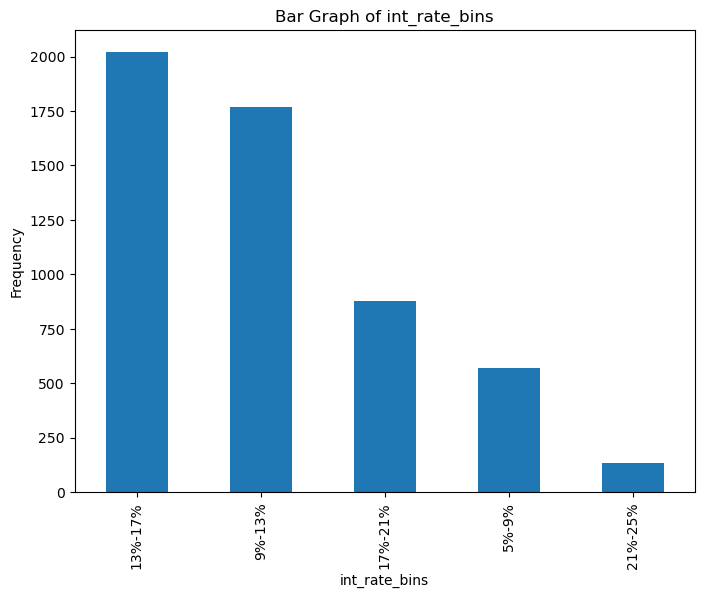

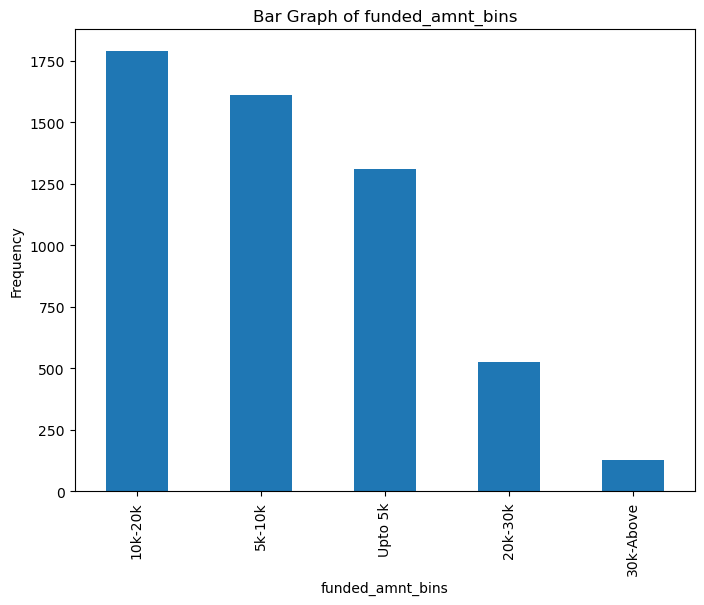

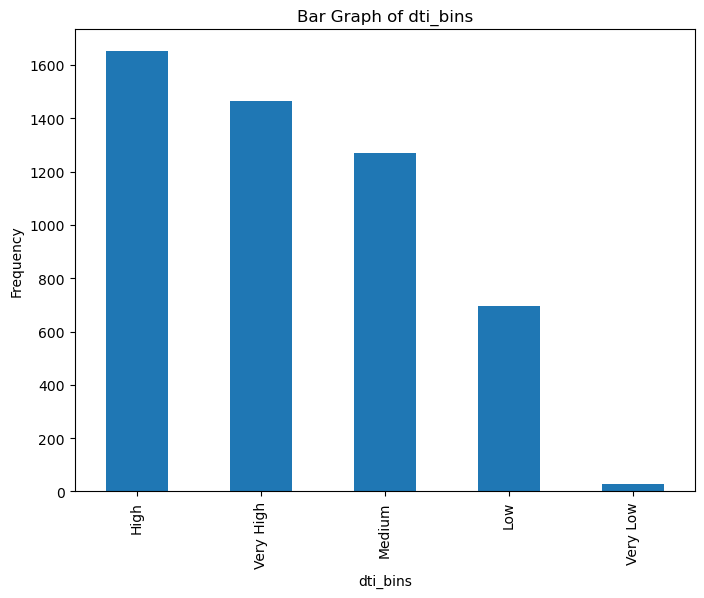

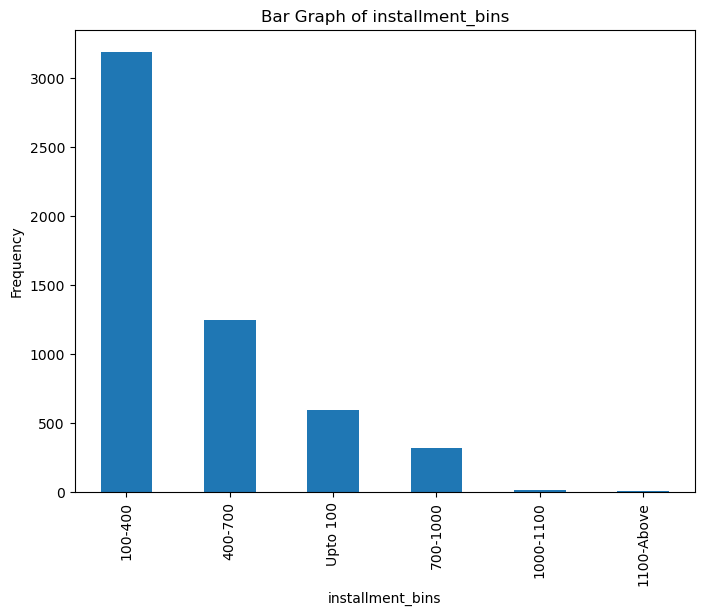

In [228]:
numerical_columns = ['annual_inc_bins','loan_amnt_bins','int_rate_bins','funded_amnt_bins','dti_bins','installment_bins']
bar_graph_plot(loan_charged_off_cust, numerical_columns)

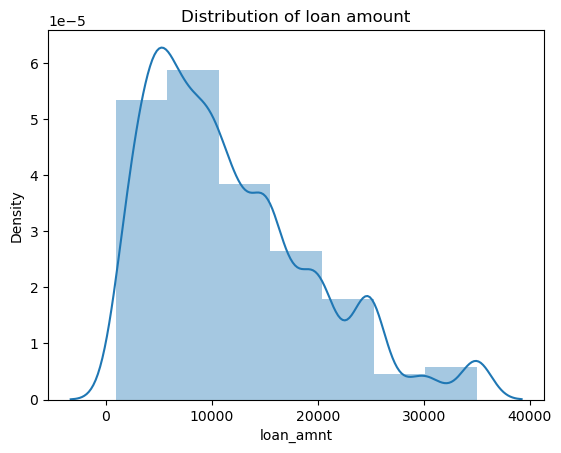

In [224]:
#Distribution of loan amount
#From this plot it is visible that the maximum loan amount range is between 5000 and 10000
sns.distplot(loan_charged_off_cust['loan_amnt'], bins=7, kde=True)
plt.title("Distribution of loan amount")
plt.show()

# Observations from Univariate Analysis
__From the ordered categorical variable analysis:__

-  Grade B has the highest number of defaulters followed by Grade C.
-  Among Grade B customers, sub grade B5 is the highest number of defaulters. Not all B grade applicants are likely to be a defaulter.
-  Loan applicants with term 36 is more than term 60. The defaulters chose less term. So the the amount per month was more are that could be the reason    for making them defaulters
-  The customers who have been working for more than 10 years are the highest number of defaulters. This suggests that even though they have a      permanent income they are making dues in payments. So the employment period is not a great point to consider the applicant is likely                  to pay back the loan amount. The second highest is the customers having employment less than 1 year. 
-  Highest number of loan was funded in the year 2011.
-  Defaulted loans were funded in December. Last quarter showas the highest number which got defaults. We can conclude loan taken during the last quarter is most likely to get defaulted.(The last quarter is the Holiday season)
  
__From the unordered categorical variable analysis:__

-  Debt consolidation is the prime purpose for the defaulters to take the loan. They were already having financial issues and took new loan. This needs to be considered very cautiously while approving the loan.
-  For most of the defaulters, their home ownership is Rent. This suggest the defaulters are already having financial issues.
-  Majority of the defaulters are from California. The lending company needs to verify the details of this loan applicants thoroughly.
-  Lening company has approved more loans without proper verification. Verification status indicates if income was verified by LC, or not verified, or if the income source was verified. We can also see that verified status defaulters are also not less. Verification process needs to be more efficient and this will help in reducing the risk of funding to defaulters.

__From the numerical variable analysis:__  

-  The maximum defaulters have annual salary below 40000. The loan was funded very less to the applicants having annual income less than 20000. This is appreciable. But in order to reduce the charged off situation the source verification will be more helpful.
-  Majority of the defaulters received a loan amount in the range 5000 -10000. The second group of defaulters were funded a loan amount less than 5000. Even though the amount was less, they were not able to repay it on time.
-  While checking the interest rate we can see that 13%-17% is the highest. The lending company should work on the interest rate that is being applied on the loan amount. Defaulters were not able to make this high interest rate amount.
-  It is observed that many defaulters had received a funded amount in the range 10000-20000. Lending company should approve this after proper verification of financial status of the loan applicants.
-  Many of the defaulters has high dti ratio. Lending company should consider this parameter for approving the loan.


# Comparison of Fully paid, Current and Charged off customers 

__Loan amount vs Loan status__

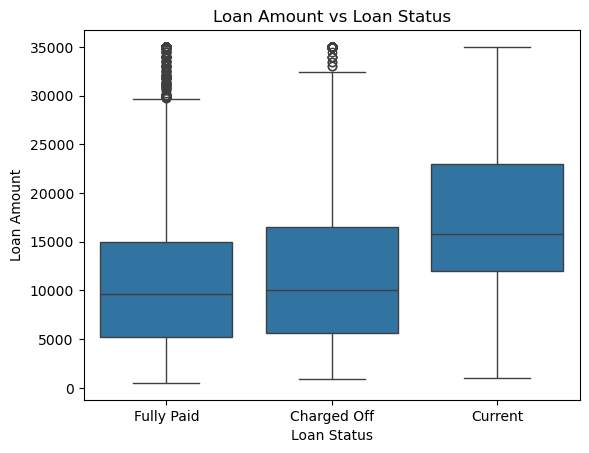

In [79]:
sns.boxplot(data=loan_file, x='loan_status', y='loan_amnt')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

Analysing how home ownership and employment length is distributes for the different loan status.

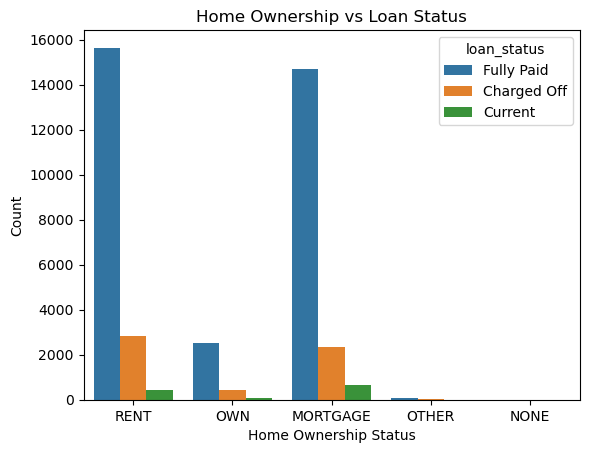

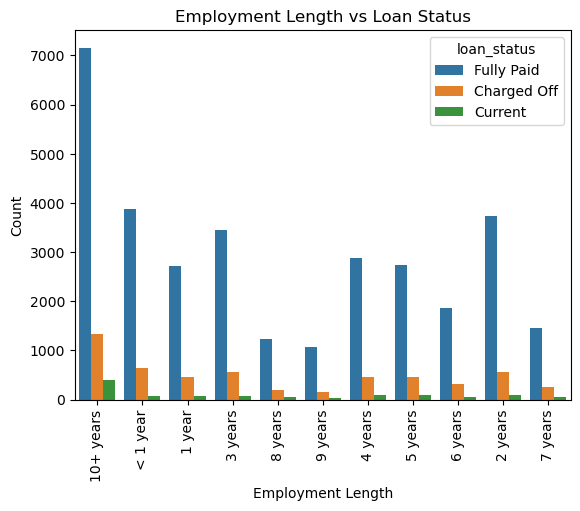

In [81]:
sns.countplot(data=loan_file, x='home_ownership', hue='loan_status')
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=loan_file, x='emp_length', hue='loan_status')
plt.title('Employment Length vs Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the analysis of the above plots. We can see that some patterns are similar for fully paid and charged off customers 
-  From the box plot of fully paid and Charged off customers we can see similar patterns. Large loan amount is more likely to default.The most of the      defaulters have the loan amount in the range 5000-15000. There are few outliers in the defaulters.
-  Rent and Mortgage customers are the highest in case of both fully paid and charged off.
-  Customers having 10+ years of experience is the highest for fully paid and charged off.


# Bivariate Analysis

__Annual Income vs home ownership/loan amount/interest rate/purpose__

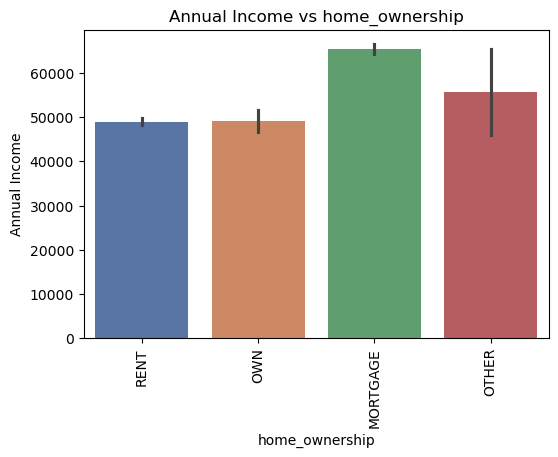

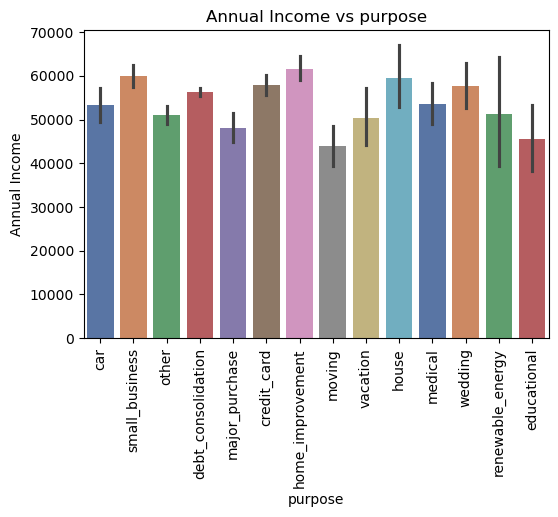

In [179]:
def annual_inc_plot(loan_charged_off_cust, vars, title_prefix='Annual Income vs '): 
    for var in vars: 
        plt.figure(figsize=(6, 4)) 
        sns.barplot(data=loan_charged_off_cust, x=var, y='annual_inc', palette="deep") 
        plt.title(f'{title_prefix}{var}') 
        plt.xlabel(var) 
        plt.ylabel('Annual Income') 
        plt.xticks(rotation=90) 
        plt.show() 
 
ann_inc_col = ['home_ownership','purpose'] 
annual_inc_plot(loan_charged_off_cust, ann_inc_col)

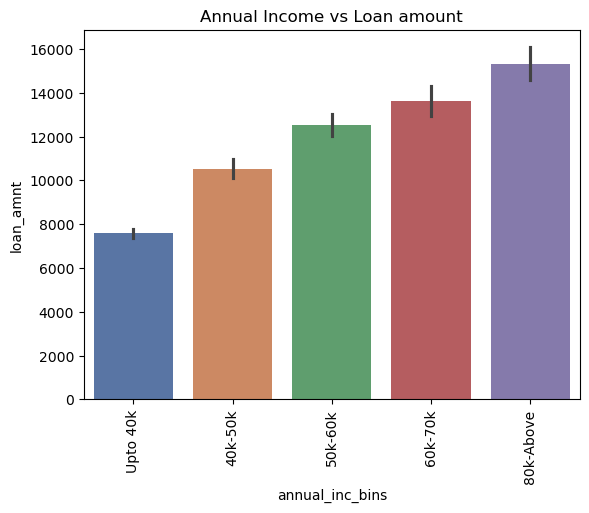

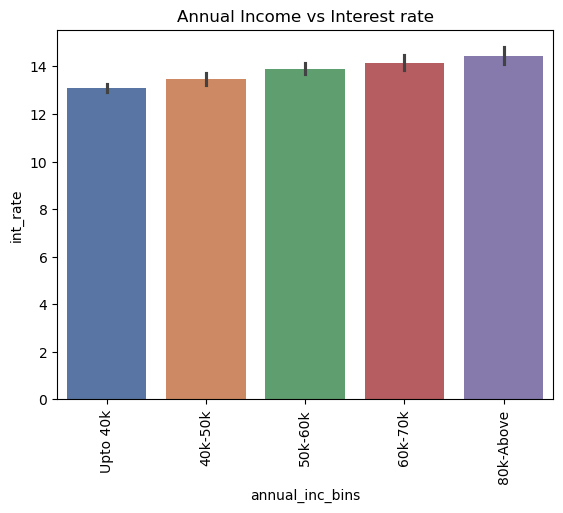

In [185]:
sns.barplot(data =loan_charged_off_cust,x='annual_inc_bins',y='loan_amnt', palette="deep")
plt.title('Annual Income vs Loan amount')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data =loan_charged_off_cust,x='annual_inc_bins',y='int_rate', palette="deep")
plt.title('Annual Income vs Interest rate')
plt.xticks(rotation=90)
plt.show()

__Loan amount vs Interest rate and dti__

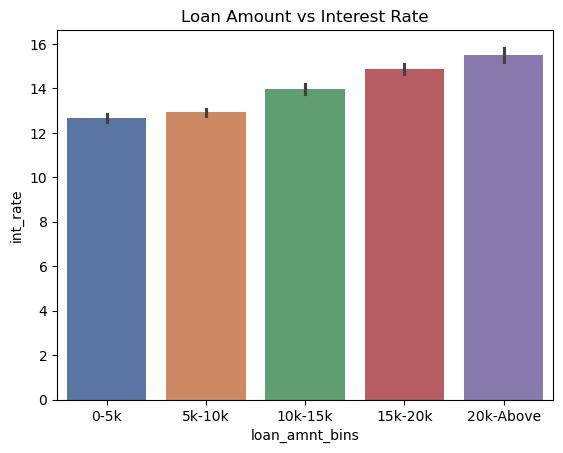

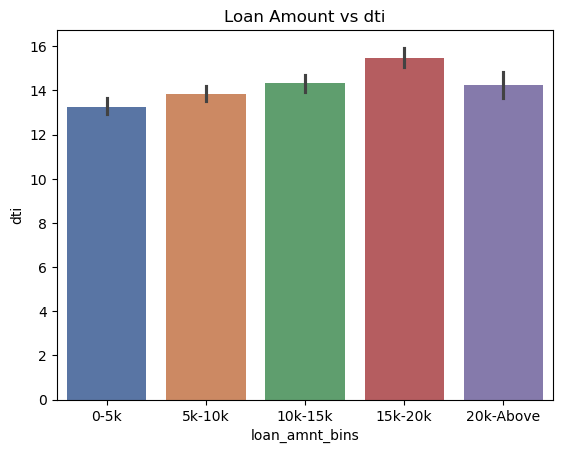

In [105]:
sns.barplot(data =loan_charged_off_cust,x='loan_amnt_bins',y='int_rate', palette="deep")
plt.title('Loan Amount vs Interest Rate')
plt.show()

sns.barplot(data =loan_charged_off_cust,x='loan_amnt_bins',y='dti', palette="deep")
plt.title('Loan Amount vs dti')
plt.show()

__Scatterplot between Loan amount vs Interest rate and installment__

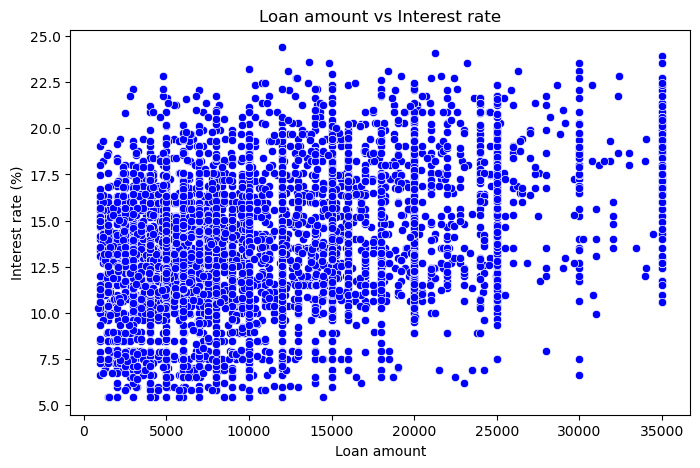

Correlation value 0.93


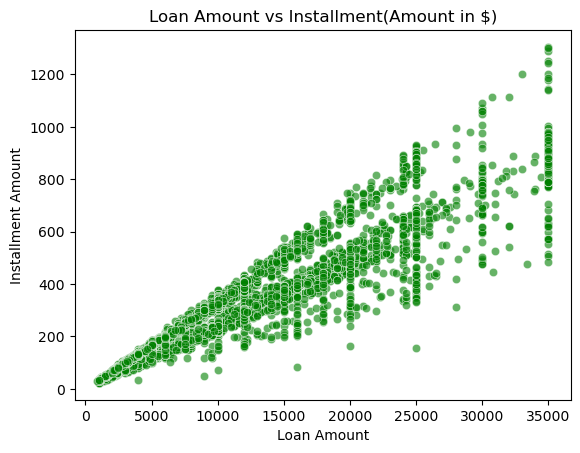

In [234]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=loan_charged_off_cust, x='loan_amnt', y='int_rate', color='blue')
plt.title('Loan amount vs Interest rate')
plt.xlabel('Loan amount')
plt.ylabel('Interest rate (%)')
plt.show()

print("Correlation value",round(loan_charged_off_cust['installment'].corr(loan_charged_off_cust['loan_amnt']),2))
sns.scatterplot(data=loan_charged_off_cust, x='loan_amnt', y='installment', color='green', alpha=0.6)
plt.title('Loan Amount vs Installment(Amount in $)')
plt.xlabel('Loan Amount')
plt.ylabel('Installment Amount')
plt.show()

__Loan amount vs various parameters__

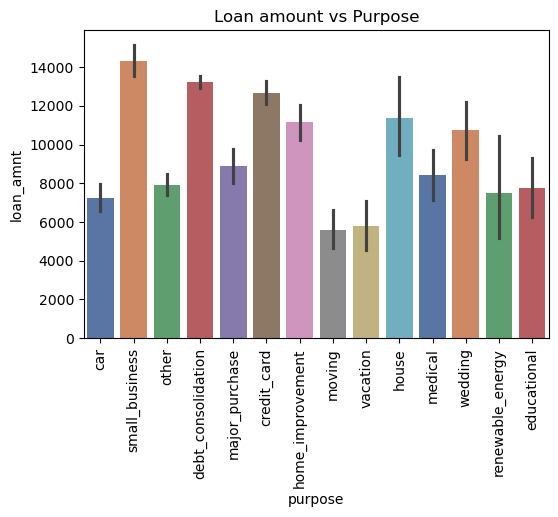

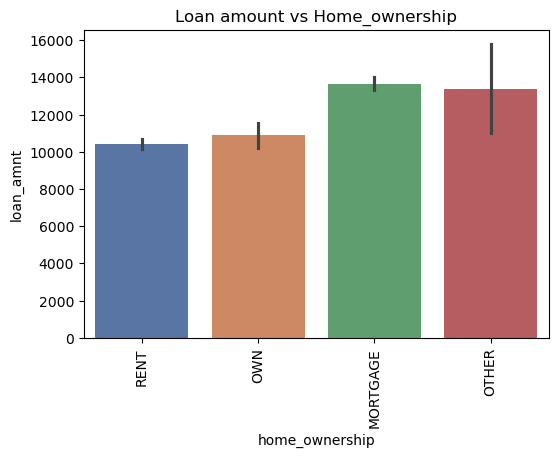

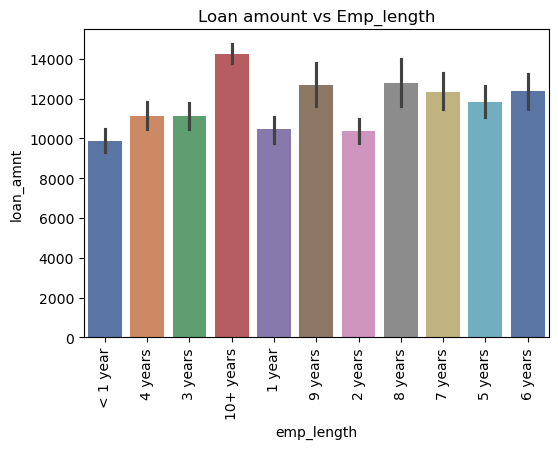

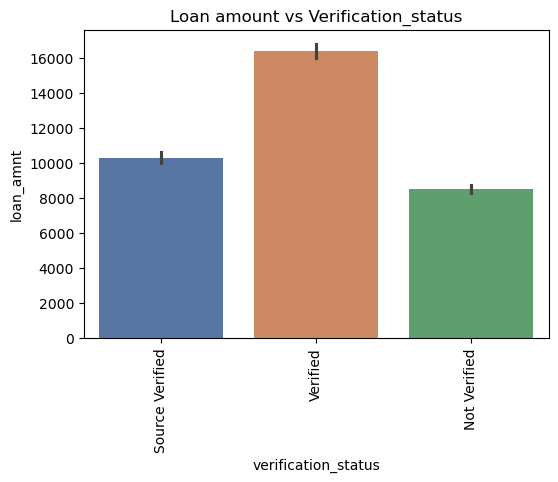

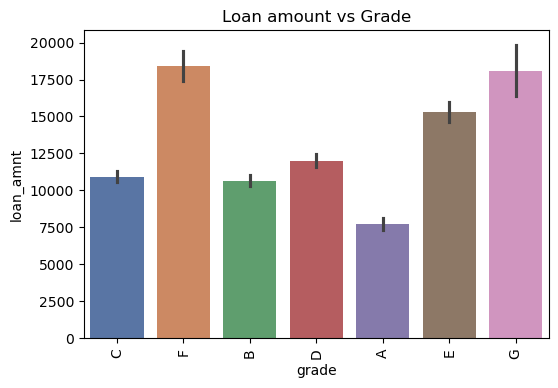

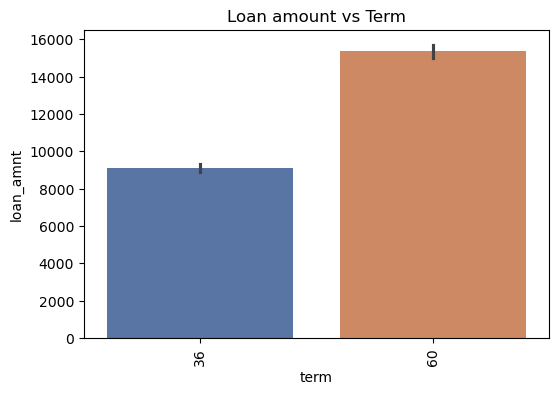

In [143]:
parameters = ['purpose','home_ownership','emp_length','verification_status','grade', 'term'] 
for par in parameters: 
    plt.figure(figsize=(6, 4)) 
    sns.barplot(data=loan_charged_off_cust, x=par, y='loan_amnt', palette="deep") 
    plt.title(f'Loan amount vs {par.capitalize()}') 
    plt.xticks(rotation=90) 
    plt.show()

__Plotting box plot for Loan Amount Distribution by Loan Status__

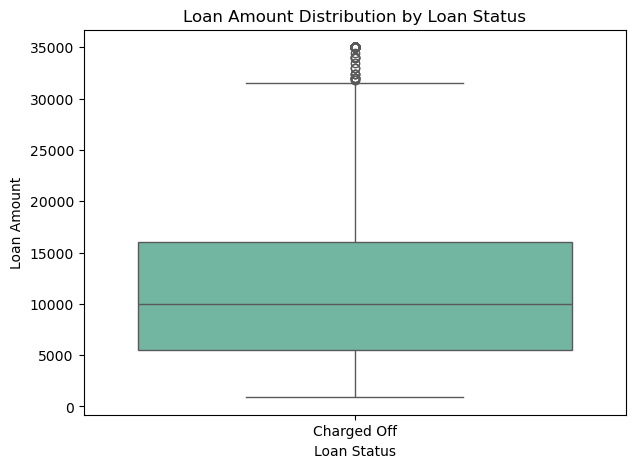

In [238]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=loan_charged_off_cust, x='loan_status', y='loan_amnt', palette="Set2")
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

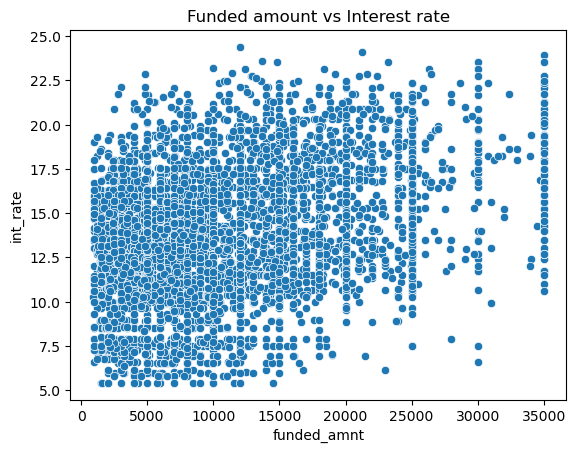

In [240]:
sns.scatterplot(data=loan_charged_off_cust, x='funded_amnt', y='int_rate')
plt.title("Funded amount vs Interest rate")
plt.show()

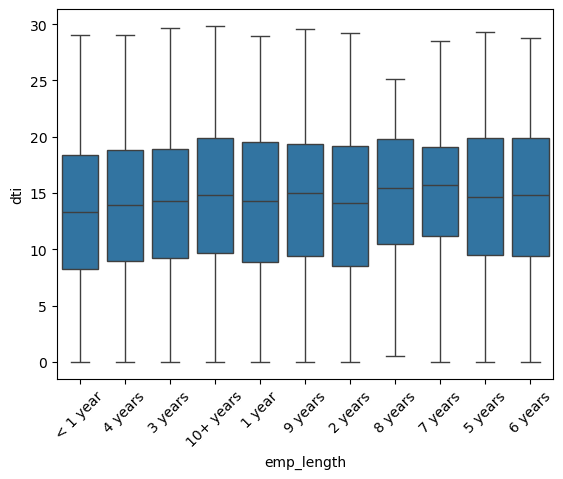

In [131]:
#Bivariate analysis between employ_length and dti. From this analysis it is observed that 10+ year experienced defaulters has
#the maximum dti and 5, 6 years are also in the same level
sns.boxplot(x='emp_length',y='dti',data=loan_charged_off_cust)
plt.xticks(rotation=45)
plt.show()

# Observations from Bivariate Analysis

-  It is observed that the defaulters who have higher annual salary took loan for home improvement followed by house, small business and wedding
- More loan amount was funded for small business
-  Loan applicants having employment length more than 10 years were funded highest loan amount
-  Loan was approved mostly for verified applicants. This is a good trend. This will reduce the risk of charged off customers.
-  Maximum average loan amount was funded to the applicants who opted term 60.
-  Most of the loan applicants who charged off have significantly high Debt-to-Income (dti) ratios.
-  Majority of loan applicants who charged off received loans with interest rates in the range of 13% to 17%.
-  larger loan amounts are associated with higher interest rates for charged-off loans. This could be due to the greater risk associated with lending  larger amounts.
-  Loan applicants belongs to Grades F and G are more likely to be defaulters
-  Loan amount funded increased from 2007 to 2011
-  Lending company funded more loan amount to Verified loan applicants. This indicates that company is very cautious in approving loan.
-  There is a positive correlation between loan amount and installments. As the loan amount increases the installment also gets increases. The correation value is 0.93.
-  As the loan amount increases the interest rate is high.
  

__From the above observations we can understand that the lending company has to take further actions:__
-  Term length: As the defaulters are more from term length 60, lending company has to identify the long term issues and modify the loan amount and interest rate accordingly
-  Employment length: As the majority of defaulters are having 10 or more years of experience, the employment length is not a great factor to consider for the loan approval. Even with the employment length parameter other measures have to taken into consideration.
-  Home ownership: Home ownership status as rented or mortgaged are the most likely to be defaulters.
-  Verification status: As the verified customers are the most charged off the company has to implement strict verification process.
-  Annual Income: Loan applicants who have annual income upto 40000 are the majority defaulters. Lending company should consider this for funding.
-  Interest rate: High interest rate is main reason for defaulting. Company should review the interest rate.
-  DTI: Many defaulters have high dti ration. This should be taken into consideration.


# Correlation Analysis

In [147]:
print("Correlation between annual income and loan amount:",loan_charged_off_cust['annual_inc'].corr(loan_charged_off_cust['loan_amnt']))
print("Correlation between loan amount and interest rate:",loan_charged_off_cust['int_rate'].corr(loan_charged_off_cust['loan_amnt']))

Correlation between annual income and loan amount: 0.46752642225763
Correlation between loan amount and interest rate: 0.33785931605279707


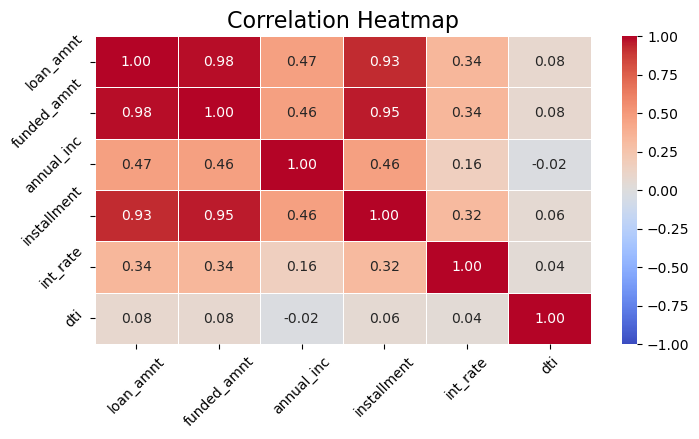

In [245]:
heatmap_columns = loan_charged_off_cust[['loan_amnt','funded_amnt','annual_inc','installment','int_rate','dti']]
correlation_matrix = heatmap_columns.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Observations from correlation analysis

-  There is a strong correlation between loan amount and instalment
- dti has weak correlation with other variables
- Annual income has negative correlation with dti
